<a href="https://colab.research.google.com/github/VaishnaviPunagin/Primaryy/blob/master/Resnet50%2BHSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
training_ds_path="/content/drive/MyDrive/BrainTumor/HSV/Training"
testing_ds_path="/content/drive/MyDrive/BrainTumor/HSV/Testing"

In [3]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mean=[23.4081, 23.4081, 23.4081]
std=[22.4781, 22.4781, 22.4781]

train_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

test_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean),torch.Tensor(std))
])

In [5]:
train_dataset=torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/BrainTumor/HSV/Training',transform=train_transforms)
test_dataset=torchvision.datasets.ImageFolder(root='/content/drive/MyDrive/BrainTumor/HSV/Testing',transform=test_transforms)

In [6]:
 def show_transformed_images(dataset):
        loader=torch.utils.data.DataLoader(dataset,batch_size=6,shuffle=True)
        batch=next(iter(loader))
        images,labels=batch
        
        grid=torchvision.utils.make_grid(images,nrow=3)
        plt.figure(figsize=(11,11))
        plt.imshow(np.transpose(grid,(1,2,0)))
        print('labels:',labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([3, 0, 3, 1, 0, 2])


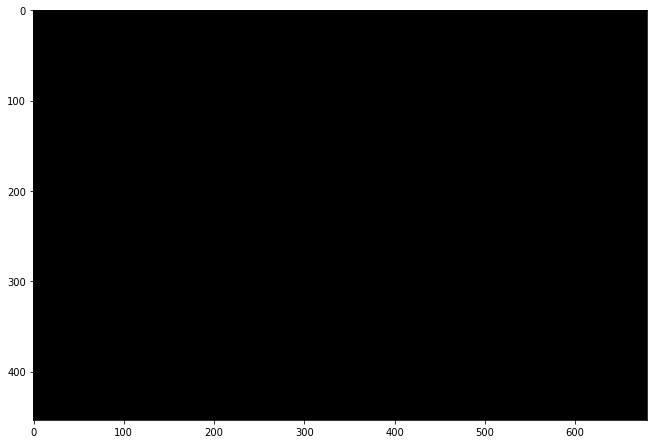

In [7]:
 show_transformed_images(train_dataset)

In [8]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=32,shuffle=False)

In [ ]:
#Completed preprocessing, we'll start models implementation after thisu
#mini batch gradient descent will be applied if we mention the mini batch size~

In [9]:
def set_device():
    if torch.cuda.is_available():
        dev="cuda:0"
    else:
        dev="cpu"
    return torch.device(dev)

In [10]:
def train_nn(model,train_loader,test_loader,criterion,optimizer,n_epochs):
    device=set_device()
    
    for epoch in range(n_epochs):
        print("Epoch number %d"%(epoch+1))
        model.train()
        running_loss=0.0
        running_correct=0.0
        total=0
        
        for data in train_loader:
            images, labels=data
            images=images.to(device)
            labels=labels.to(device)
            total+=labels.size(0)
            
            optimizer.zero_grad()
            
            outputs=model(images)
            
            _,predicted=torch.max(outputs.data,1)
            
            loss=criterion(outputs,labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss+=loss.item()
            
            running_correct+=(labels==predicted).sum().item()
            
        epoch_loss=running_loss/len(train_loader)
        epoch_acc=100.00*running_correct/total
        
        print(" -Training DS. Got %d out of %d images correctly (%.3f%%). Epoch  loss: %.3f" 
              % (running_correct,total,epoch_acc, epoch_loss))
        
        evaluate_model_on_test_set(model,test_loader)
        
    print("Finished")
    return model

In [11]:
def evaluate_model_on_test_set(model,test_loader):
    model.eval()
    predicted_correctly_on_epoch=0
    total=0
    device=set_device()
    
    with torch.no_grad():
        for data in test_loader:
            images, labels=data
            images=images.to(device)
            labels=labels.to(device)
            total+=labels.size(0) 
            
            outputs=model(images)
            
            _,predicted=torch.max(outputs.data,1)
            
            predicted_correctly_on_epoch += (predicted ==labels).sum().item()
            
    epoch_acc=100.0*predicted_correctly_on_epoch/total
    print(" -Testing DS. Got %d out of %d images correctly (%.3f%%)" 
              % (predicted_correctly_on_epoch,total,epoch_acc))

In [12]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

resnet50_model=models.resnet50(pretrained=False)
num_ftrs=resnet50_model.fc.in_features
number_of_classes=4
#now we take above 2 vars & in nn.linear-linear is the function that takes number of i/p & o/p features as parameters and 
#prepares required matrices for forward propagation
resnet50_model.fc=nn.Linear(num_ftrs,number_of_classes)
device=set_device()
resnet_50_model=resnet50_model.to(device)
loss_fn=nn.CrossEntropyLoss()
#using stochastic gradient descent for optimizer
optimizer=optim.SGD(resnet50_model.parameters(),lr=0.01,momentum=0.9,weight_decay=0.003)

In [13]:
train_nn(resnet50_model,train_loader,test_loader,loss_fn,optimizer,150)

Epoch number 1
 -Training DS. Got 738 out of 2870 images correctly (25.714%). Epoch  loss: 4.100
 -Testing DS. Got 827 out of 2870 images correctly (28.815%)
Epoch number 2
 -Training DS. Got 837 out of 2870 images correctly (29.164%). Epoch  loss: 1.412
 -Testing DS. Got 826 out of 2870 images correctly (28.780%)
Epoch number 3
 -Training DS. Got 829 out of 2870 images correctly (28.885%). Epoch  loss: 1.408
 -Testing DS. Got 826 out of 2870 images correctly (28.780%)
Epoch number 4
 -Training DS. Got 975 out of 2870 images correctly (33.972%). Epoch  loss: 1.319
 -Testing DS. Got 970 out of 2870 images correctly (33.798%)
Epoch number 5
 -Training DS. Got 1060 out of 2870 images correctly (36.934%). Epoch  loss: 1.304
 -Testing DS. Got 888 out of 2870 images correctly (30.941%)
Epoch number 6
 -Training DS. Got 1190 out of 2870 images correctly (41.463%). Epoch  loss: 1.219
 -Testing DS. Got 854 out of 2870 images correctly (29.756%)
Epoch number 7
 -Training DS. Got 1366 out of 2870

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 